In [1]:
import pandas as pd
import numpy as np
import re
import missingno as msno

import os
import glob

import platform
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## 2. 지역별 음식물 쓰레기 배출 추정정보
* https://www.bigdata-environment.kr/user/data_market/detail.do?id=b5341100-3074-11eb-bc79-3b11eb915d6d

In [2]:
folder_path = "./data/지자체별음식물쓰레기배출내역/"
all_files = glob.glob(folder_path + "/*.csv")

df_gar = pd.DataFrame()

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df_gar = pd.concat(li, axis=0, ignore_index=True)

In [3]:
df_gar

,exhst_yy,exhst_mt_md,exhst_de_day,exhst_week_day,locgov_relm_cd,locgov_atpt_nm,locgov_signgu_nm,apt_cd,apt_nm,exhst_qy,exhst_rate_ct,exhst_co,exhst_co_rate_ct
0,2018,11,6,3,W01,서울특별시,종로구,NaN,NaN,3283150,3.14,2236,3.33
1,2018,11,7,4,W01,서울특별시,종로구,NaN,NaN,3033000,2.90,2226,3.31
2,2018,11,8,5,W01,서울특별시,종로구,NaN,NaN,2544000,2.43,1727,2.57
3,2018,11,9,6,W01,서울특별시,종로구,NaN,NaN,3732850,3.57,2419,3.60
4,2018,11,10,7,W01,서울특별시,종로구,NaN,NaN,3451200,3.30,2124,3.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99696,2020,8,27,5,W6Z,서울특별시,송파구,NaN,NaN,54065050,2.80,45965,3.15
99697,2020,8,28,6,W6Z,서울특별시,송파구,NaN,NaN,55954600,2.90,46827,3.21
99698,2020,8,29,7,W6Z,서울특별시,송파구,NaN,NaN,52618150,2.72,40304,2.76
99699,2020,8,30,1,W6Z,서울특별시,송파구,NaN,NaN,75686950,3.92,55294,3.79


In [4]:
df_gar.isnull().sum()

exhst_yy                0
exhst_mt_md             0
exhst_de_day            0
exhst_week_day          0
locgov_relm_cd          0
locgov_atpt_nm          0
locgov_signgu_nm        0
apt_cd              99701
apt_nm              99701
exhst_qy                0
exhst_rate_ct           0
exhst_co                0
exhst_co_rate_ct        0
dtype: int64

In [5]:
view_columns = ['exhst_yy',	'exhst_mt_md', 'exhst_de_day', 'locgov_atpt_nm', 'locgov_signgu_nm', 'exhst_qy', 'exhst_rate_ct', 'exhst_co', 'exhst_co_rate_ct']

df_gar = df_gar[view_columns]
df_gar

,exhst_yy,exhst_mt_md,exhst_de_day,locgov_atpt_nm,locgov_signgu_nm,exhst_qy,exhst_rate_ct,exhst_co,exhst_co_rate_ct
0,2018,11,6,서울특별시,종로구,3283150,3.14,2236,3.33
1,2018,11,7,서울특별시,종로구,3033000,2.90,2226,3.31
2,2018,11,8,서울특별시,종로구,2544000,2.43,1727,2.57
3,2018,11,9,서울특별시,종로구,3732850,3.57,2419,3.60
4,2018,11,10,서울특별시,종로구,3451200,3.30,2124,3.16
...,...,...,...,...,...,...,...,...,...
99696,2020,8,27,서울특별시,송파구,54065050,2.80,45965,3.15
99697,2020,8,28,서울특별시,송파구,55954600,2.90,46827,3.21
99698,2020,8,29,서울특별시,송파구,52618150,2.72,40304,2.76
99699,2020,8,30,서울특별시,송파구,75686950,3.92,55294,3.79


In [6]:
# 담당 부서에 데이터 확인해서 변수명을 바꿔준다
df_gar.columns = ['연도', '월', '일', '시도명', '시군구명', '배출량', '배출량비율', '배출건수', '배출건수비율']
df_gar

,연도,월,일,시도명,시군구명,배출량,배출량비율,배출건수,배출건수비율
0,2018,11,6,서울특별시,종로구,3283150,3.14,2236,3.33
1,2018,11,7,서울특별시,종로구,3033000,2.90,2226,3.31
2,2018,11,8,서울특별시,종로구,2544000,2.43,1727,2.57
3,2018,11,9,서울특별시,종로구,3732850,3.57,2419,3.60
4,2018,11,10,서울특별시,종로구,3451200,3.30,2124,3.16
...,...,...,...,...,...,...,...,...,...
99696,2020,8,27,서울특별시,송파구,54065050,2.80,45965,3.15
99697,2020,8,28,서울특별시,송파구,55954600,2.90,46827,3.21
99698,2020,8,29,서울특별시,송파구,52618150,2.72,40304,2.76
99699,2020,8,30,서울특별시,송파구,75686950,3.92,55294,3.79


In [7]:
# 연월일 결합
# df_gar['날짜'] = pd.to_datetime(df_gar['일'].astype(str) + df_gar['월'].astype(str) + df_gar['연도'].astype(str), errors='coerce', format='%d%m%Y')

# 코드가 길때 \ 로 줄 바꾸기 (위와 같음)
df_gar['날짜'] = pd.to_datetime(df_gar['일'].astype(str) + df_gar['월'].astype(str) \
    + df_gar['연도'].astype(str), errors='coerce', format='%d%m%Y')

In [8]:
# 연월 추출
# http://daplus.net/python-pandas-datetime-%EC%97%B4%EA%B3%BC-%EB%B3%84%EB%8F%84%EB%A1%9C-%EC%9B%94%EA%B3%BC-%EC%97%B0%EB%8F%84-%EC%B6%94%EC%B6%9C/

df_gar['연월'] = df_gar['날짜'].dt.to_period('M')
df_gar.head()

,연도,월,일,시도명,시군구명,배출량,배출량비율,배출건수,배출건수비율,날짜,연월
0,2018,11,6,서울특별시,종로구,3283150,3.14,2236,3.33,2018-11-06,2018-11
1,2018,11,7,서울특별시,종로구,3033000,2.90,2226,3.31,2018-11-07,2018-11
2,2018,11,8,서울특별시,종로구,2544000,2.43,1727,2.57,2018-11-08,2018-11
3,2018,11,9,서울특별시,종로구,3732850,3.57,2419,3.60,2018-11-09,2018-11
4,2018,11,10,서울특별시,종로구,3451200,3.30,2124,3.16,2018-11-10,2018-11


In [9]:
category_feature = [col for col in df_gar.columns if df_gar[col].dtypes == 'object']

for col in category_feature:
    print(df_gar[col].unique())
    print(df_gar[col].nunique())

['서울특별시' '부산광역시' '대구광역시' '인천광역시' '광주광역시' '대전광역시' '울산광역시' '경기도' '강원도'
 '충청북도' '충청남도' '전라북도' '전라남도' '경상북도' '경상남도' '제주특별자치도']
16
['종로구' '중구' '용산구' '성동구' '광진구' '동대문구' '중랑구' '성북구' '강북구' '도봉구' '은평구' '노원구'
 '서대문구' '마포구' '양천구' '강서구' '구로구' '금천구' '영등포구' '동작구' '관악구' '서초구' '강남구' '강동구'
 '서구' '동구' '영도구' '부산진구' '동래구' '남구' '북구' '해운대구' '사하구' '금정구' '연제구' '수영구'
 '사상구' '기장군' '수성구' '달성군' '달서구' '미추홀구' '연수구' '남동구' '부평구' '계양구' '강화군' '광산구'
 '유성구' '대덕구' '울주군' '수원시장안구' '수원시권선구' '수원시팔달구' '성남시분당구' '수원시영통구' '성남시중원구'
 '의정부시' '안양시' '부천시' '평택시' '동두천시' '고양시' '과천시' '구리시' '남양주시' '오산시' '시흥시'
 '군포시' '의왕시' '하남시' '용인시' '파주시' '이천시' '화성시' '광주시' '양주시' '포천시' '여주시' '춘천시'
 '원주시' '강릉시' '동해시' '속초시' '삼척시' '홍천군' '횡성군' '영월군' '정선군' '철원군' '양구군' '고성군'
 '청주시' '서산시' '부여군' '군산시' '익산시' '정읍시' '진안군' '임실군' '순창군' '고창군' '부안군' '목포시'
 '여수시' '순천시' '나주시' '광양시' '곡성군' '무안군' '함평군' '포항시' '김천시' '안동시' '구미시' '영주시'
 '영천시' '상주시' '경산시' '영덕군' '예천군' '울진군' '울릉군' '창원시' '진주시' '통영시' '김해시' '거제시'
 '양산시' '의령군' '창녕군' '하동군' '제주시' '송파구' '서귀포시']
135


### 다양한 컬러 옵션을 줄 수 있다
* https://matplotlib.org/stable/gallery/color/named_colors.html 

Text(0.5, 1.0, '쓰레기 배출량 시도별 순위')

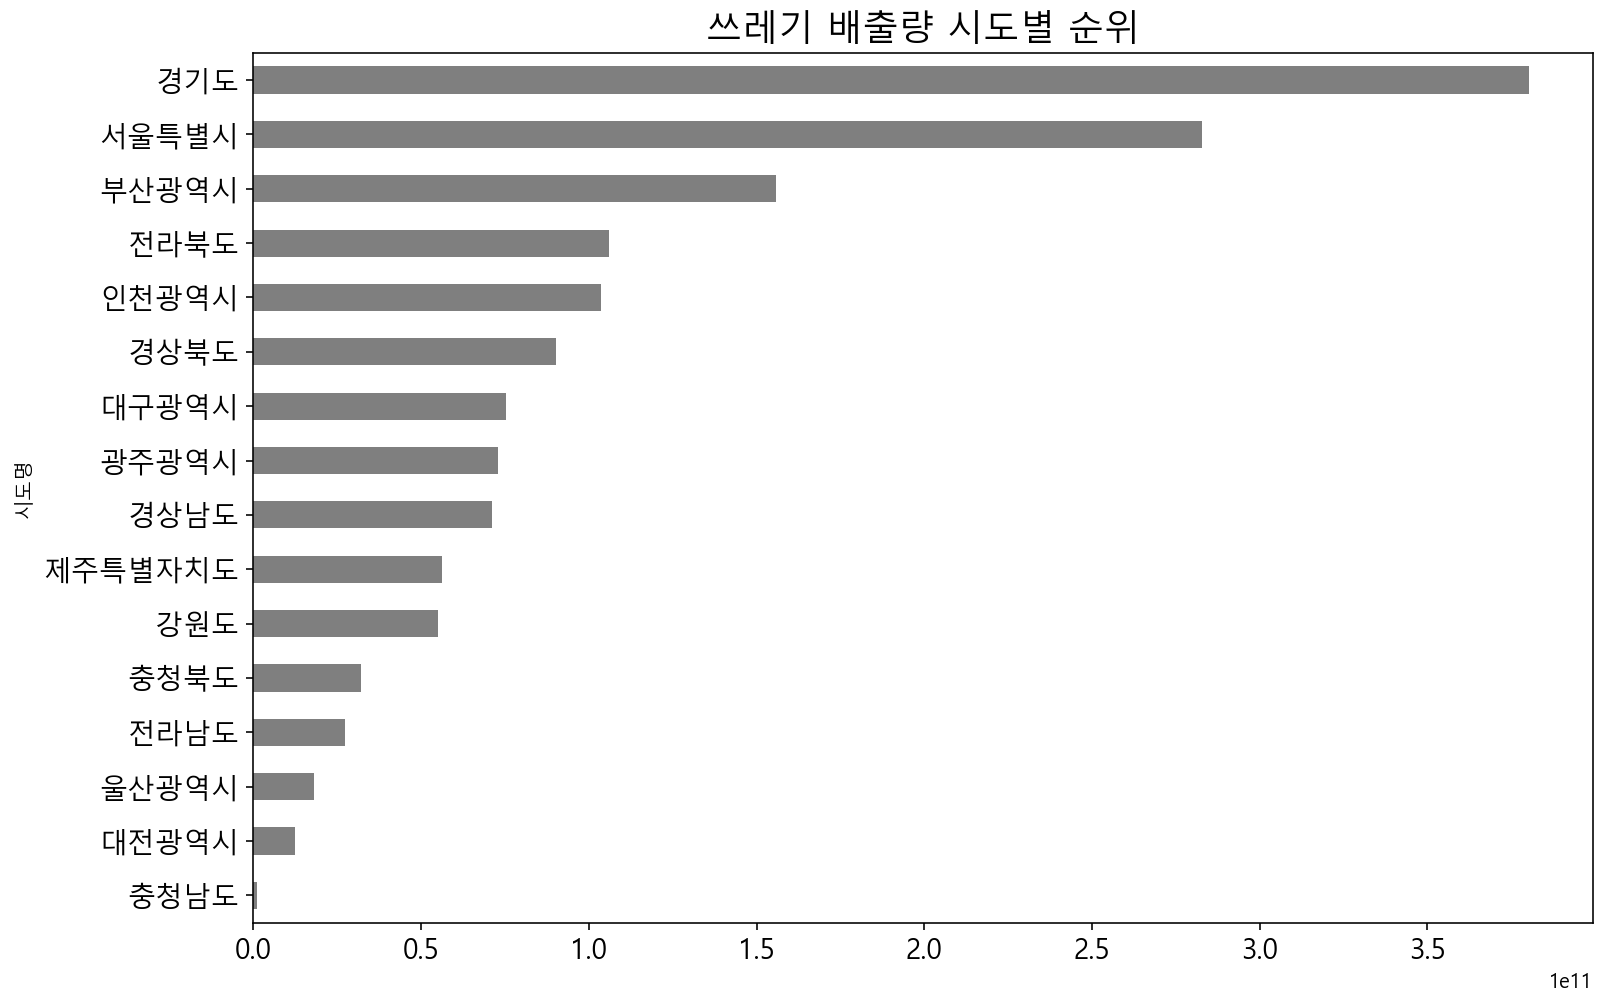

In [11]:
# df_gar.groupby('시도명')['배출량'].sum().sort_values(ascending=False)[0:20].plot(kind='bar', color='#0072BD', figsize=(12,8), title = "시도별 쓰레기배출량 상위 20")

df_gar_20 = df_gar.groupby('시도명')['배출량'].sum().sort_values()[-20:]

df_gar_20.plot(kind='barh', color='tab:gray', figsize=(12,8), fontsize=14) 
plt.title('쓰레기 배출량 시도별 순위', fontsize=18)
# 경기 > 서울

In [12]:
# 서울, 경기만 분리
# 서울/서울시/서울특별시, 경기/경기도 섞여있으면 처리해야 하나 유니크하므로 쉬운 방법

df_gar_seoul = df_gar[df_gar['시도명'] == '서울특별시']
df_gar_kyung = df_gar[df_gar['시도명'] == '경기도']

print(df_gar_seoul.head())
print(df_gar_kyung.head())

     연도   월   일    시도명 시군구명      배출량  배출량비율  배출건수  배출건수비율         날짜       연월
0  2018  11   6  서울특별시  종로구  3283150   3.14  2236    3.33 2018-11-06  2018-11
1  2018  11   7  서울특별시  종로구  3033000   2.90  2226    3.31 2018-11-07  2018-11
2  2018  11   8  서울특별시  종로구  2544000   2.43  1727    2.57 2018-11-08  2018-11
3  2018  11   9  서울특별시  종로구  3732850   3.57  2419    3.60 2018-11-09  2018-11
4  2018  11  10  서울특별시  종로구  3451200   3.30  2124    3.16 2018-11-10  2018-11
         연도   월  일  시도명    시군구명       배출량  배출량비율   배출건수  배출건수비율         날짜  \
48138  2018  11  1  경기도  수원시장안구  25207300   2.82  15361    3.32 2018-01-11   
48139  2018  11  2  경기도  수원시장안구  22891300   2.56  14070    3.04 2018-01-21   
48140  2018  11  3  경기도  수원시장안구  24772250   2.77  13956    3.01 2018-01-31   
48141  2018  11  4  경기도  수원시장안구  34289400   3.83  18435    3.98 2018-11-04   
48142  2018  11  5  경기도  수원시장안구  28456500   3.18  15894    3.43 2018-11-05   

            연월  
48138  2018-01  
48139  2018-01  
48140  2018-

## 서울

In [13]:
df_gar_seoul.groupby(['시군구명'])['배출량'].sum().sort_values(ascending=False)

시군구명
송파구     38265512065
도봉구     34790954457
노원구     32942231384
마포구     20825545358
영등포구    18647711639
강동구     14253903549
양천구     12177225579
중랑구     11582342110
동작구     11450788663
서대문구    11004141699
성동구      9915469267
서초구      9714324358
동대문구     8487977398
강서구      7844540723
금천구      7115182020
성북구      5924439193
광진구      5490445600
관악구      4566695953
중구       4395584448
은평구      4248779407
구로구      3732283305
종로구      2390357650
강남구      1418405631
강북구      1385646550
용산구       220185394
Name: 배출량, dtype: int64

Text(0.5, 1.0, '서울시 구별 쓰레기배출 총량 상위 20')

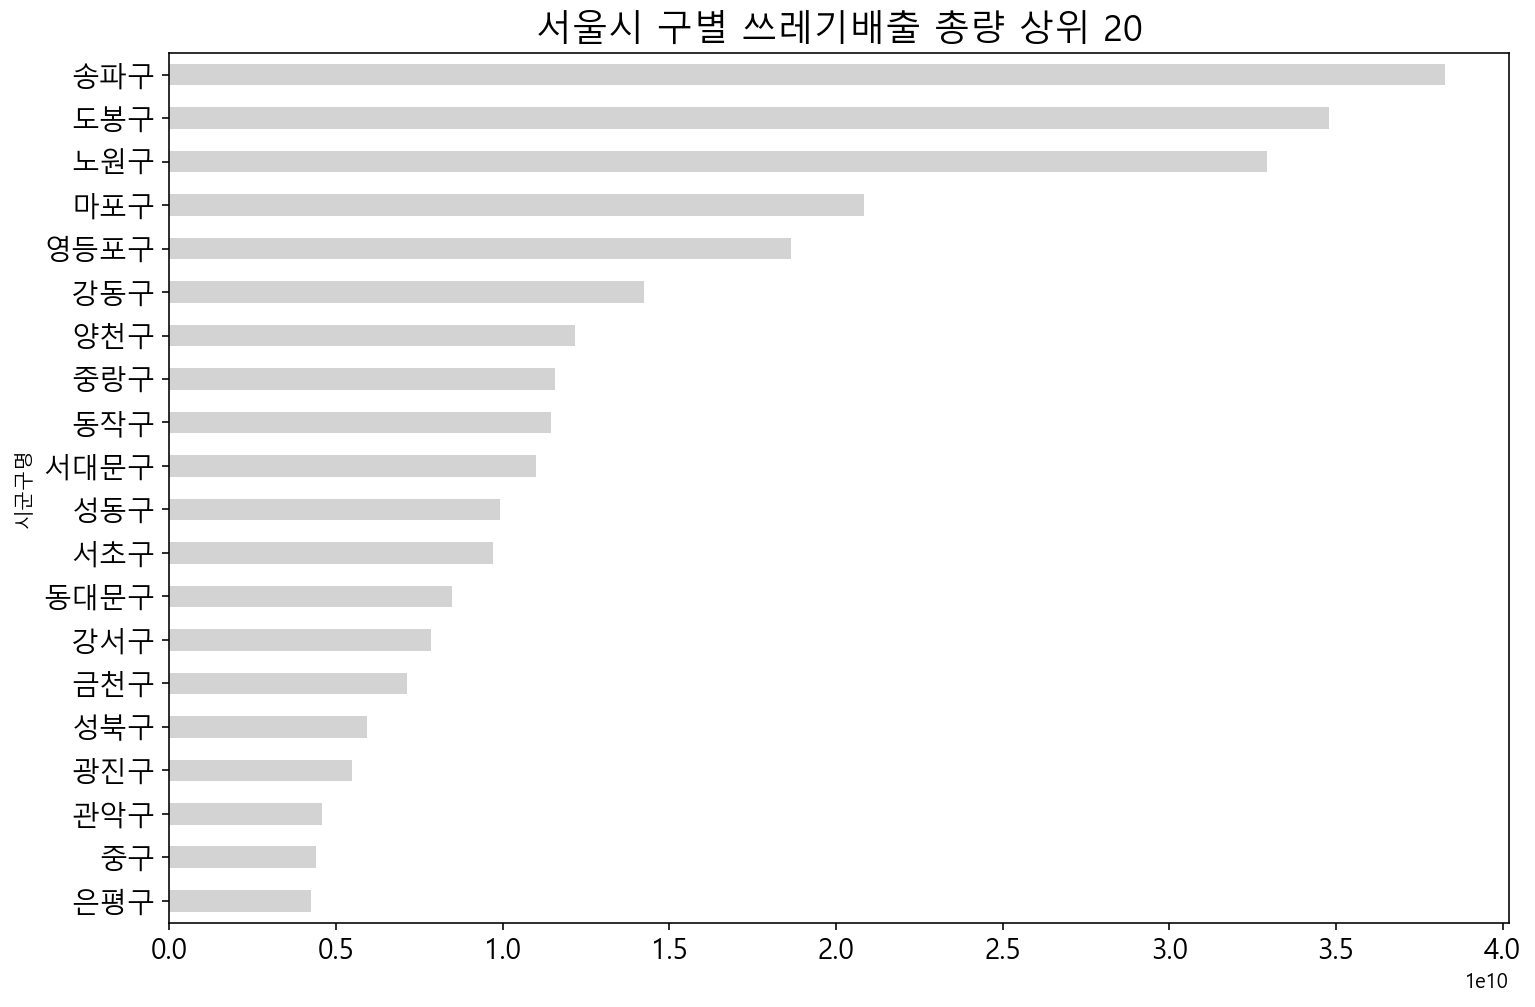

In [14]:
# https://matplotlib.org/stable/gallery/color/named_colors.html # 다양한 컬러 옵션

df_gar_seoul_20 = df_gar_seoul.groupby(['시군구명'])['배출량'].sum().sort_values()[-20:]

df_gar_seoul_20.plot(kind='barh', color='lightgray', figsize=(12,8), fontsize=14) 
plt.title("서울시 구별 쓰레기배출 총량 상위 20", fontsize=18)

In [15]:
df_gar_seoul.groupby(['시군구명'])['배출량'].mean().sort_values(ascending=False)

시군구명
송파구     5.711270e+07
도봉구     5.192680e+07
노원구     4.916751e+07
마포구     3.108290e+07
영등포구    2.783241e+07
강동구     2.127448e+07
양천구     1.817496e+07
중랑구     1.728708e+07
동작구     1.709073e+07
서대문구    1.642409e+07
성동구     1.479921e+07
서초구     1.449899e+07
동대문구    1.266862e+07
강서구     1.170827e+07
금천구     1.061967e+07
성북구     8.842447e+06
광진구     8.194695e+06
관악구     6.815964e+06
중구      6.560574e+06
은평구     6.341462e+06
구로구     5.570572e+06
종로구     3.567698e+06
강남구     2.117023e+06
강북구     2.068129e+06
용산구     3.286349e+05
Name: 배출량, dtype: float64

Text(0.5, 1.0, '서울시 구별 쓰레기배출 평균 상위 20')

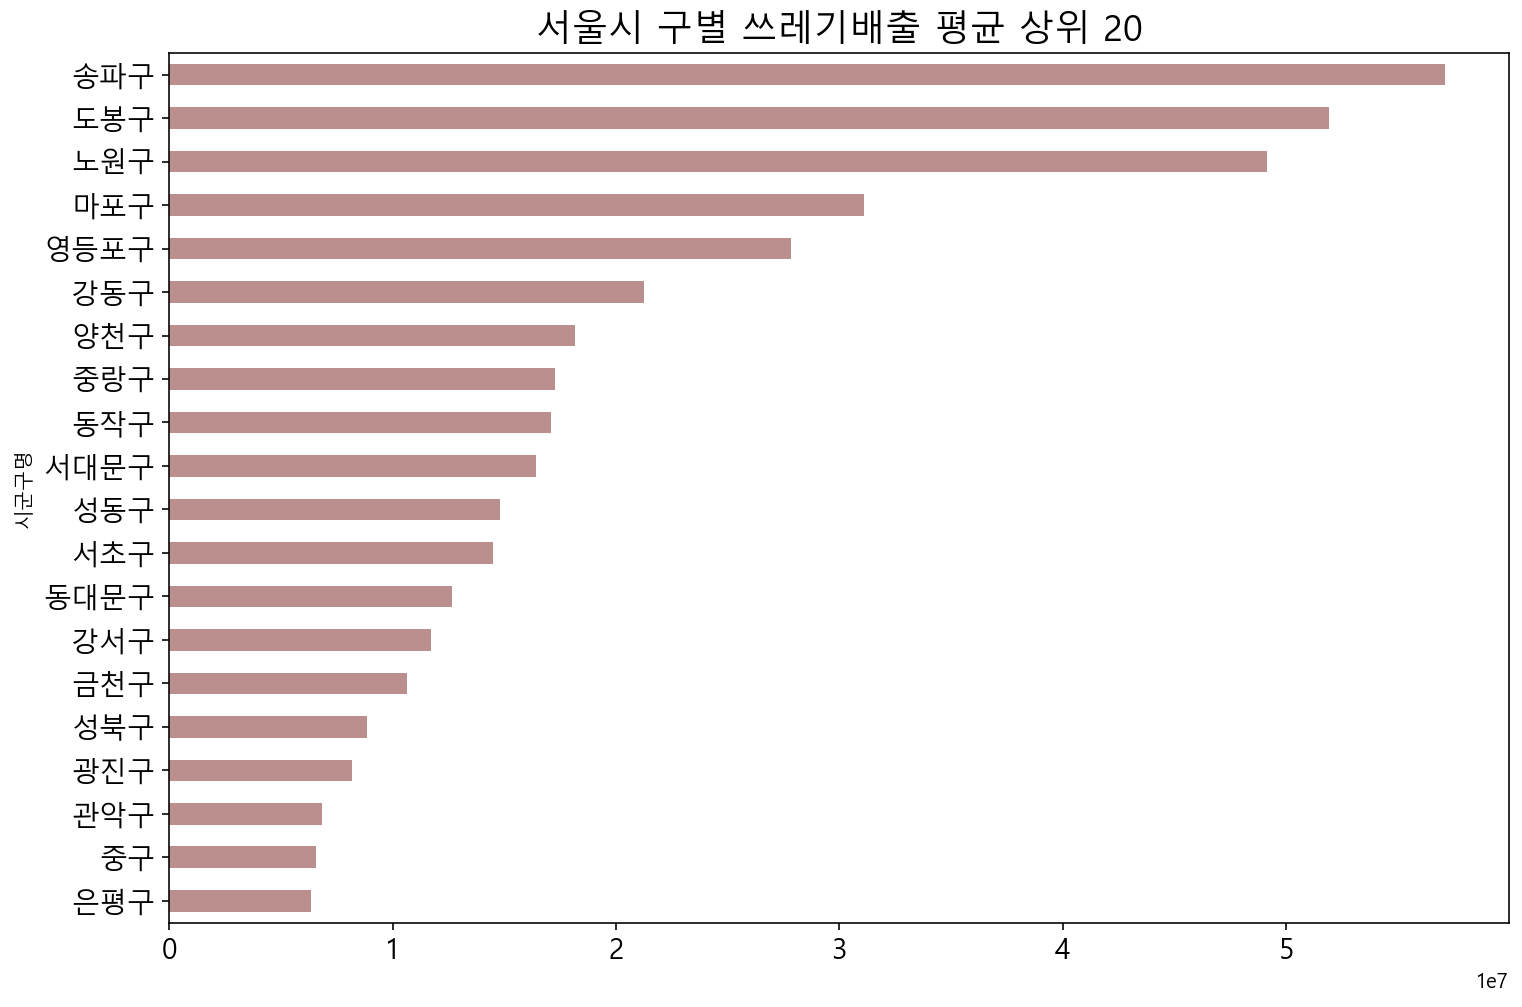

In [16]:
# df_gar_seoul.groupby(['시군구명'])['배출량'].mean().sort_values(ascending=False)[0:20].plot(kind='bar', color='darkgoldenrod', figsize=(12,8)) 

df_gar_seoul_20_mean = df_gar_seoul.groupby(['시군구명'])['배출량'].mean().sort_values()[-20:]

df_gar_seoul_20_mean.plot(kind='barh', color='rosybrown', figsize=(12,8), fontsize=14) 
plt.title("서울시 구별 쓰레기배출 평균 상위 20", fontsize=18)

## 경기

In [17]:
df_gar_kyung.groupby(['시군구명'])['배출량'].sum().sort_values(ascending=False)

시군구명
용인시       77289270975
화성시       61991688475
수원시영통구    32894163975
수원시권선구    26313559942
파주시       18308563100
오산시       18077588367
수원시장안구    17693118950
구리시       16580144365
의왕시       15938075949
양주시       12536261531
부천시       12254047855
남양주시      11488745075
이천시       10370579586
수원시팔달구     8169482346
평택시        5251901651
시흥시        5116102420
동두천시       4948755086
포천시        4840903600
의정부시       4627308971
군포시        4354128350
안양시        4016120575
여주시        3320673100
하남시        2678085078
고양시         446605925
성남시분당구      309268950
성남시중원구      243938800
과천시         155459800
광주시           4078726
Name: 배출량, dtype: int64

Text(0.5, 1.0, '경기도 시군구별 쓰레기배출 총량 상위 20')

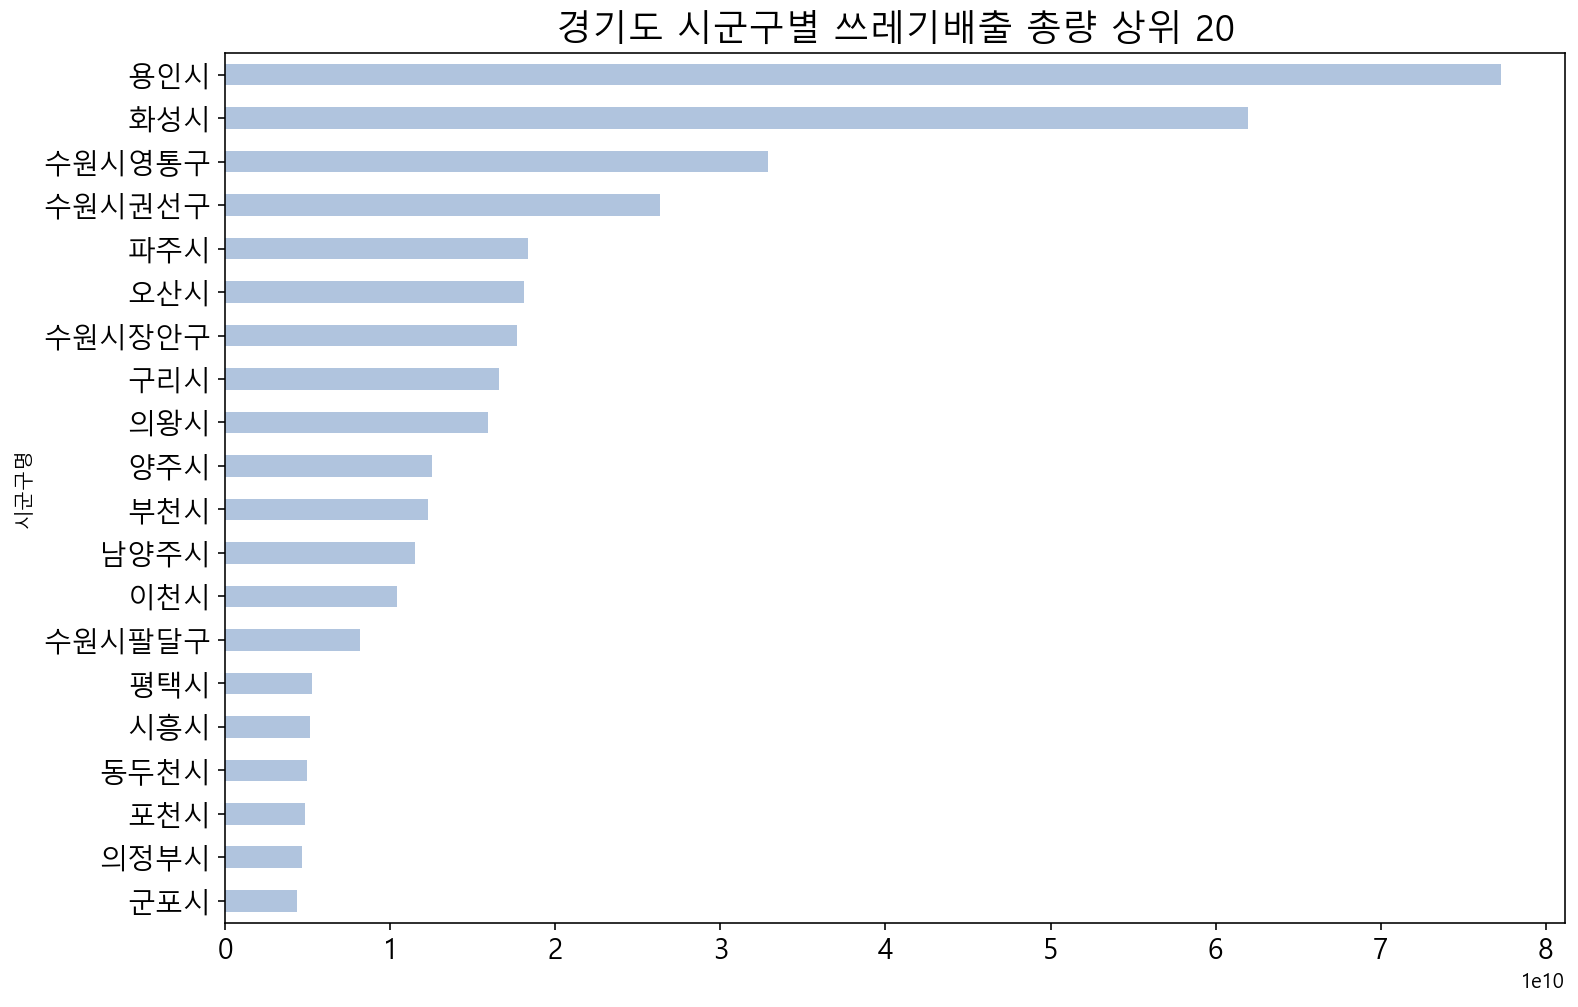

In [17]:
df_gar_kyung_20 = df_gar_kyung.groupby(['시군구명'])['배출량'].sum().sort_values()[-20:]

df_gar_kyung_20.plot(kind='barh', color='lightsteelblue', figsize=(12,8), fontsize=14)
plt.title("경기도 시군구별 쓰레기배출 총량 상위 20", fontsize=18)

Text(0.5, 1.0, '경기도 시군구별 쓰레기배출 평균 상위 20')

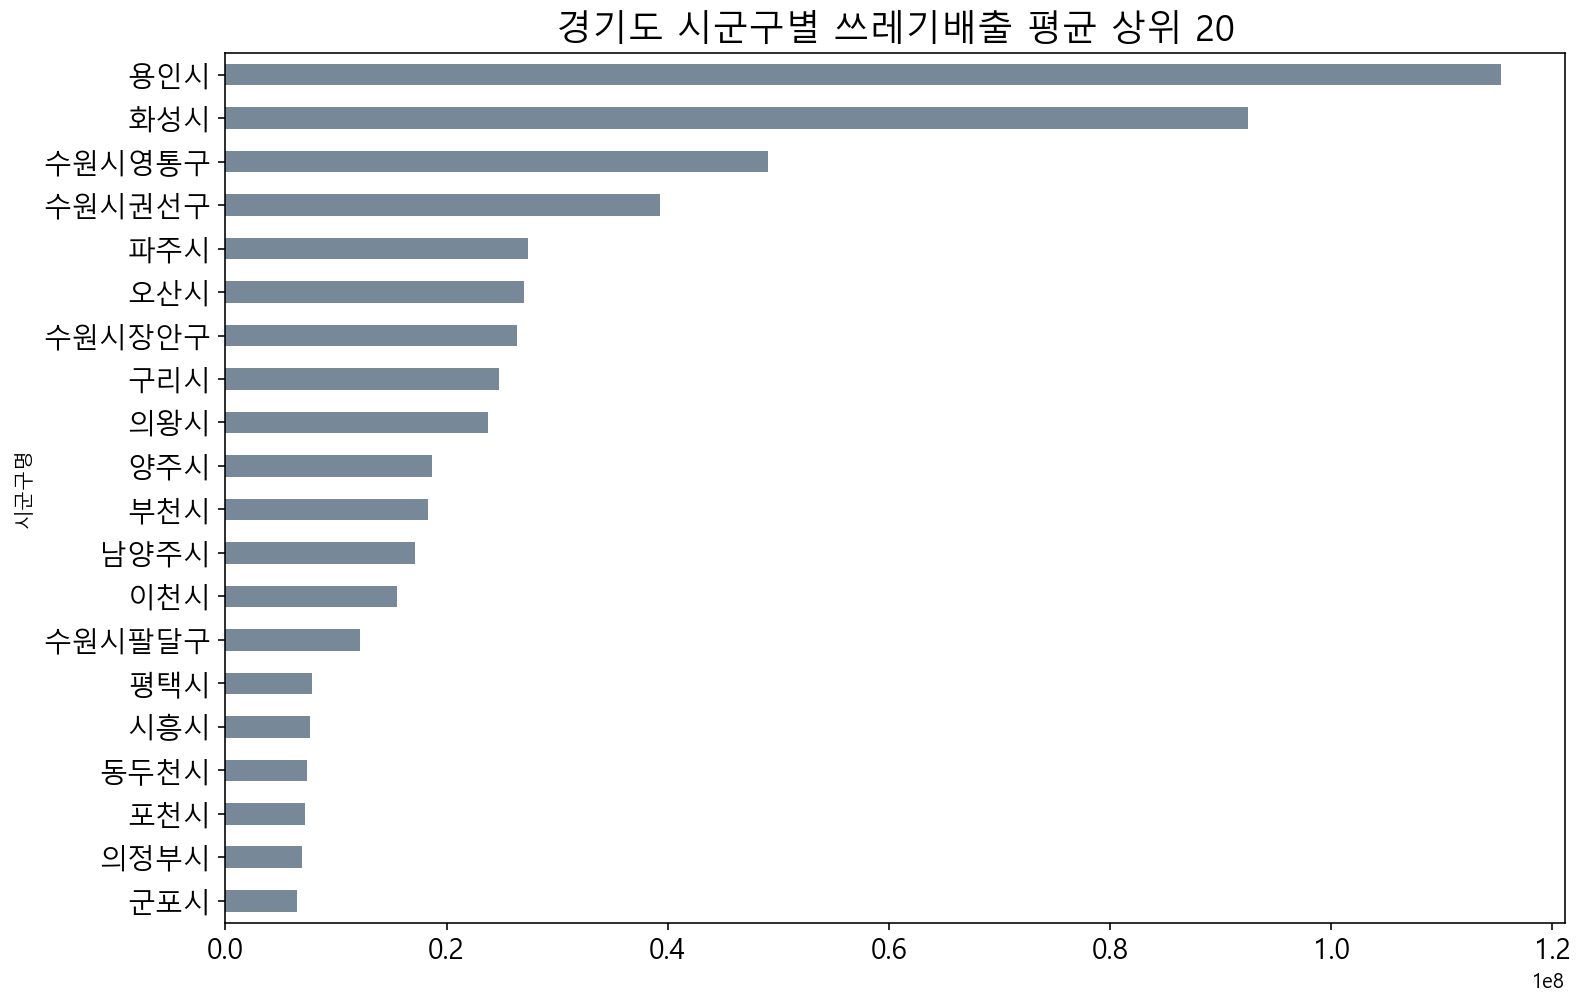

In [19]:
df_gar_kyung_20_mean = df_gar_kyung.groupby(['시군구명'])['배출량'].mean().sort_values()[-20:]

df_gar_kyung_20_mean.plot(kind='barh', color='lightslategray', figsize=(12,8), fontsize=14)
plt.title("경기도 시군구별 쓰레기배출 평균 상위 20", fontsize=18)

## folium 활용한 <쓰레기 배출량> 지도 choropleth 시각화
* 구별로 쓰레기 배출량을 표현하기 위해 GeoJSON 파일 로드
    * 파일출처 : [southkorea/seoul-maps: Seoul administrative divisions in ESRI Shapefile, GeoJSON and TopoJSON formats.](https://github.com/southkorea/seoul-maps)

In [20]:
import folium
import json

geo_path = './data/skorea_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

In [21]:
# 지도 그리기 위해 앞에서 처리한 서울시 상권 위도, 경도 데이터 로딩
df_shop_seoul = pd.read_csv('./data/df_shop_seoul.csv')
df_shop_seoul.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,도로명주소,경도,위도
0,비지트,NaN,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길 82,126.991394,37.488375
1,쓰리에프,NaN,음식,한식,한식/백반/한정식,서울특별시,동작구,사당2동,사당동,서울특별시 동작구 사당동 139-72,서울특별시 동작구 동작대로27가길 12,126.980952,37.487105
2,채움,NaN,음식,한식,한식/백반/한정식,서울특별시,종로구,종로1.2.3.4가동,수송동,서울특별시 종로구 수송동 58,서울특별시 종로구 삼봉로 81,126.981794,37.572387
3,호구의주방,NaN,소매,가정/주방/인테리어,주방가구판매,서울특별시,영등포구,양평2동,양평동4가,서울특별시 영등포구 양평동4가 160-2,서울특별시 영등포구 선유로 269,126.897892,37.536700
4,다향,NaN,음식,한식,한식/백반/한정식,서울특별시,서초구,서초3동,서초동,서울특별시 서초구 서초동 1485-3,서울특별시 서초구 효령로 230,127.009382,37.483436


In [22]:
df_garbage_seoul = pd.DataFrame(df_gar_seoul.groupby(['시군구명'])['배출량'].sum().sort_values(ascending=False))
df_garbage_seoul 

,배출량
시군구명,
송파구,38265512065
도봉구,34790954457
노원구,32942231384
마포구,20825545358
영등포구,18647711639
강동구,14253903549
양천구,12177225579
중랑구,11582342110
동작구,11450788663


In [40]:
# https://python-visualization.github.io/folium/quickstart.html
# https://matplotlib.org/stable/gallery/color/colormap_reference.html

map = folium.Map(location=[df_shop_seoul['위도'].mean(), df_shop_seoul['경도'].mean()], 
                 zoom_start=11)

map.choropleth(geo_data = geo_json,
               data = df_garbage_seoul['배출량'],
               columns = [df_shop_seoul.index, df_garbage_seoul['배출량']],
               fill_color = 'Greys',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)
map


## 이후 연계분석 위해 '서울시 구별 쓰레기배출량' 데이터프레임으로 저장

In [25]:
df_garbage_seoul.to_csv('./data/df_garbage_seoul.csv')

## 구별 음식점수, 쓰레기 배출량의 상관관계 (학습용)
* 음식점수, 쓰레기 배출량 측정 시기와 기준이 다릅니다
* 실제로 상관관계를 보려면 기준/기간을 동일하게 하여 측정한 데이터를 사용해야 합니다
* 여기에서는 "학습" 차원에서, 두 데이터를 합쳐 변수간 상관관계를 살펴보는 방법을 실습합니다

In [23]:
# 앞에서 처리한 서울시 구별 음식점 수 csv 데이터 로딩
df_food_seoul = pd.read_csv('./data/df_food_seoul.csv')
df_food_seoul

,시군구명,음식점수
0,강남구,12723
1,마포구,7684
2,송파구,7348
3,서초구,6610
4,강서구,6393
5,영등포구,6389
6,관악구,5387
7,강동구,5181
8,종로구,5158
9,중구,4869


In [24]:
# 앞에서 처리한 서울시 구별 쓰레기 배출량 csv 데이터 로딩
df_garbage_seoul = pd.read_csv('./data/df_garbage_seoul.csv')
df_garbage_seoul

,시군구명,배출량
0,송파구,38265512065
1,도봉구,34790954457
2,노원구,32942231384
3,마포구,20825545358
4,영등포구,18647711639
5,강동구,14253903549
6,양천구,12177225579
7,중랑구,11582342110
8,동작구,11450788663
9,서대문구,11004141699


In [25]:
df_food_garbage = pd.merge(df_food_seoul, df_garbage_seoul)
df_food_garbage

,시군구명,음식점수,배출량
0,강남구,12723,1418405631
1,마포구,7684,20825545358
2,송파구,7348,38265512065
3,서초구,6610,9714324358
4,강서구,6393,7844540723
5,영등포구,6389,18647711639
6,관악구,5387,4566695953
7,강동구,5181,14253903549
8,종로구,5158,2390357650
9,중구,4869,4395584448


In [26]:
df_food_garbage.describe()

,음식점수,배출량
count,25.000000,2.500000e+01
mean,5048.120000,1.131163e+10
std,2064.582349,1.041689e+10
min,2690.000000,2.201854e+08
25%,3917.000000,4.395584e+09
50%,4583.000000,8.487977e+09
75%,5387.000000,1.217723e+10
max,12723.000000,3.826551e+10


Text(0.5, 1.0, '구별 음식점 수와 음식물 쓰레기 배출량의 관계')

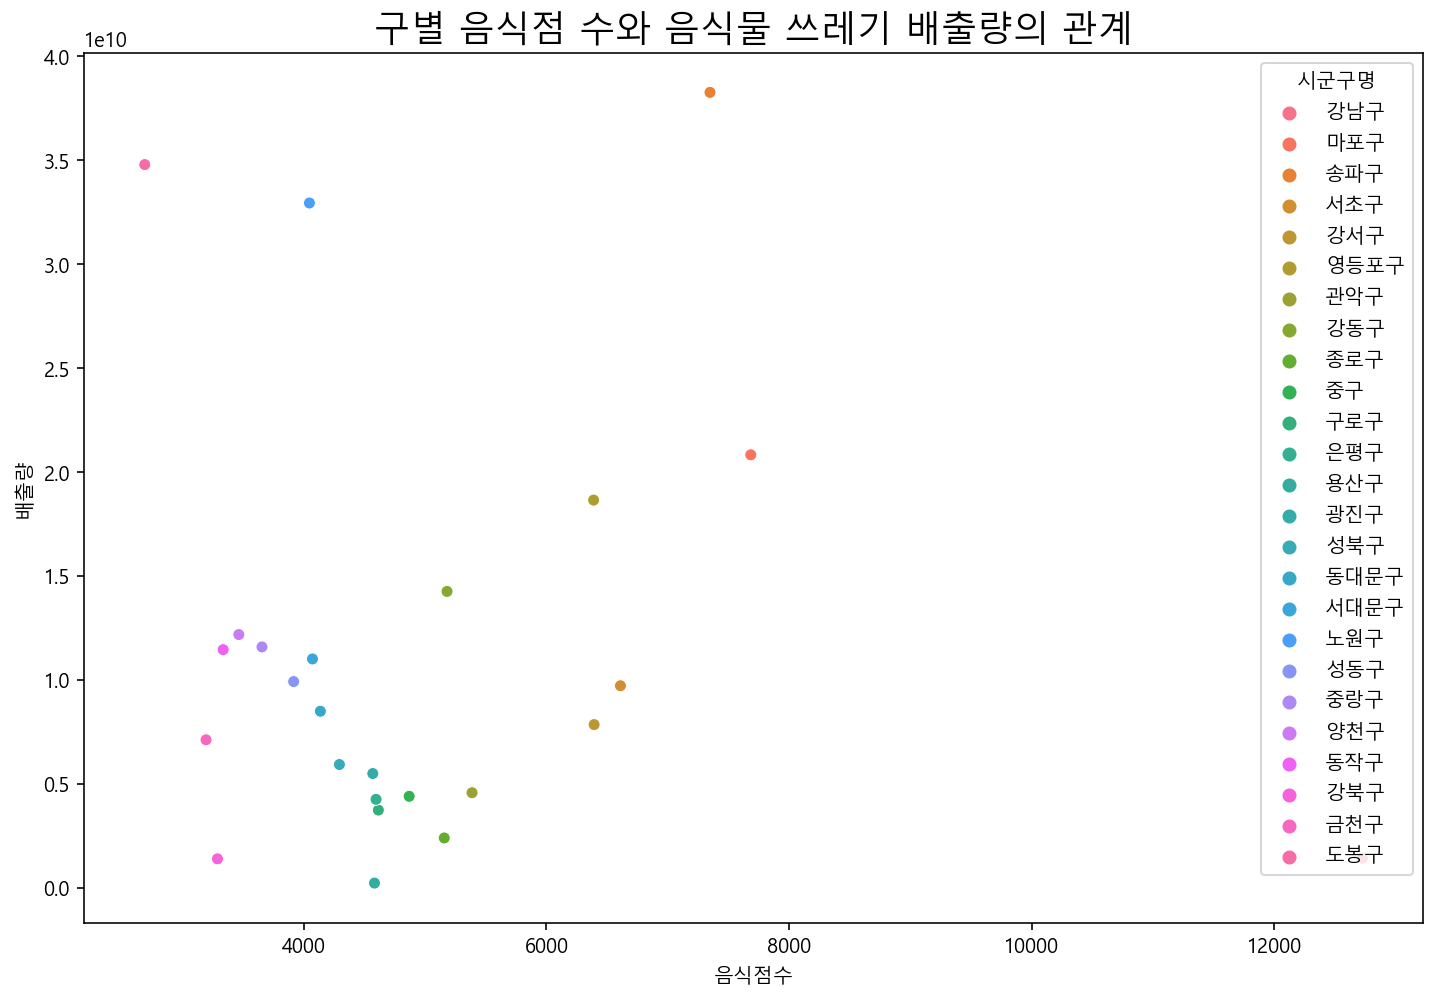

In [40]:
plt.figure(figsize = (12,8))
sns.scatterplot(x='음식점수', y='배출량', hue='시군구명', data=df_food_garbage)
plt.title('구별 음식점 수와 음식물 쓰레기 배출량의 관계', fontsize=18)

Text(0.5, 1.0, '구별 음식점 수와 음식물 쓰레기 배출량의 관계 - 회귀선 추가')

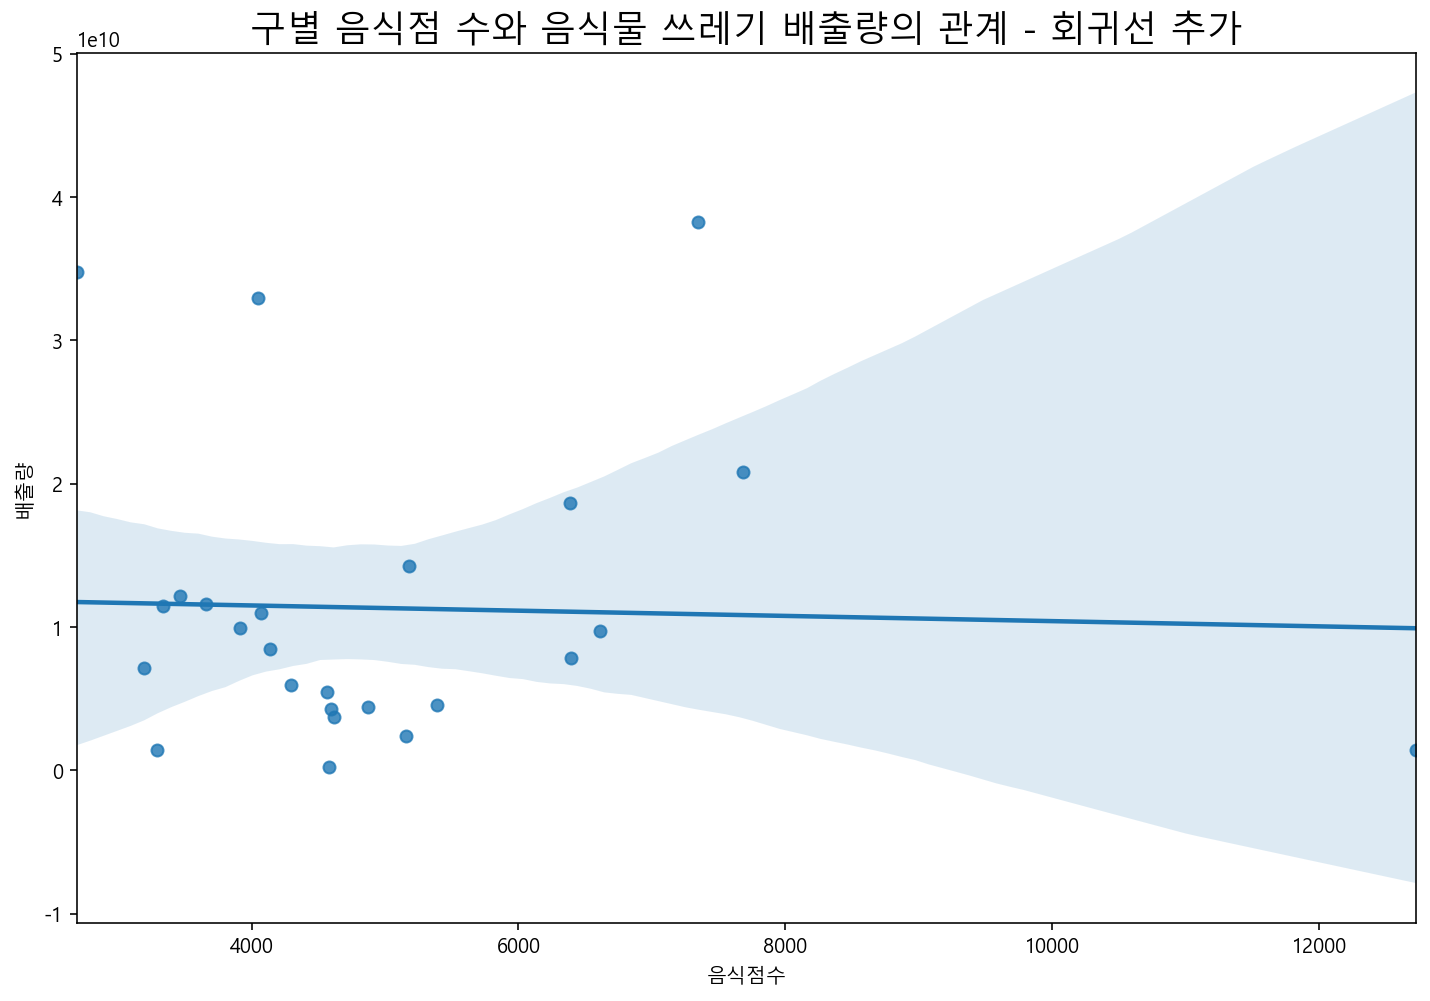

In [41]:
plt.figure(figsize = (12,8))
sns.regplot(x='음식점수', y='배출량', data=df_food_garbage)
plt.title('구별 음식점 수와 음식물 쓰레기 배출량의 관계 - 회귀선 추가', fontsize=18)

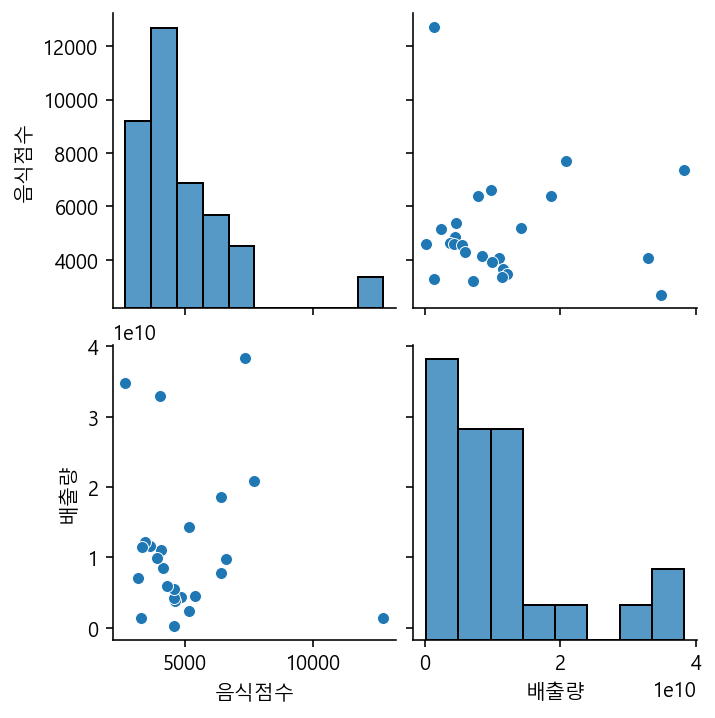

In [32]:
sns.pairplot(df_food_garbage)

In [32]:
df_food_garbage.corr()

,음식점수,배출량
음식점수,1.000000,-0.036131
배출량,-0.036131,1.000000


Text(0.5, 1.0, '음식점 수와 음식물 쓰레기 양의 상관관계 분석')

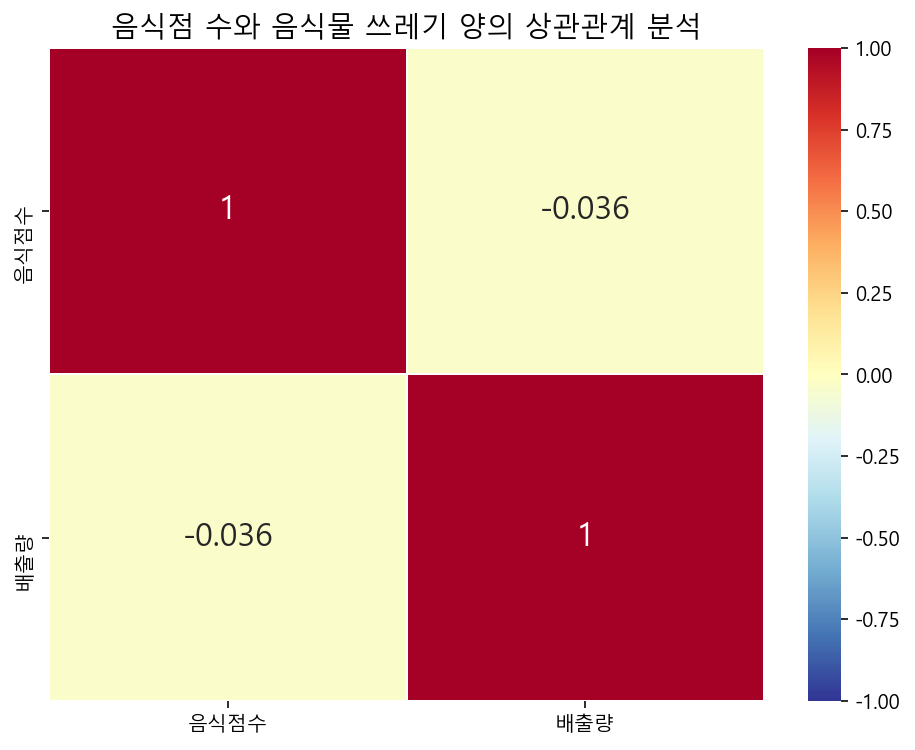

In [43]:
# https://m.blog.naver.com/kiddwannabe/221763497317

plt.figure(figsize = (8, 6))
sns.heatmap(df_food_garbage.corr(), 
            annot = True,      
            cmap = 'RdYlBu_r',
            linewidths=1, 
            vmin = -1, vmax = 1,
            annot_kws={"size": 16}
            )
plt.title('음식점 수와 음식물 쓰레기 양의 상관관계 분석', fontsize=14)